# Plot difference between vital parameter value and alarm threshold

Create boxplot and violin plot that visualize the difference between the vital parameter value and the violated alarm threshold.
Do this for triggered alarms that were identified... 

* based on the uncleaned chartsevents data (`CHARTEVENTS.csv`) and 
* based on the cleaned CHARTEVENT data (`chartevents_cleaned.parquet`).


In [1]:
import pandas as pd
import pyarrow as pa

# Read from csv file
uncleaned_alarms = pd.read_csv('../../alarm_violations.csv')
cleaned_alarms = pd.read_csv('../../data/alarms/alarm_data.csv')

In [2]:
# Create new column that contains the difference between vital parameter value and threshold value of triggered alarm
uncleaned_alarms['DIF_PARAMETER_THRESHOLD'] = uncleaned_alarms['VALUENUM'] - uncleaned_alarms['THRESHOLD_VALUE']
cleaned_alarms['DIF_PARAMETER_THRESHOLD'] = cleaned_alarms['VALUENUM_CLEAN'] - cleaned_alarms['THRESHOLD_VALUE']

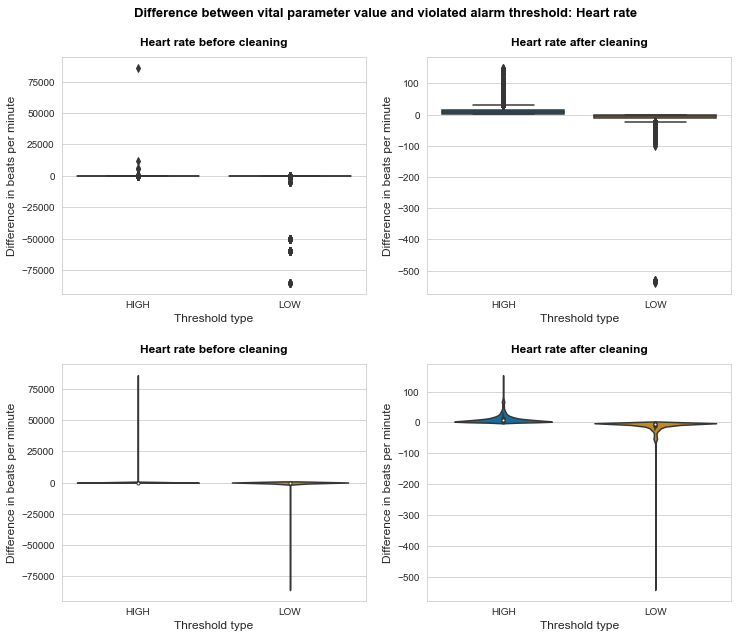

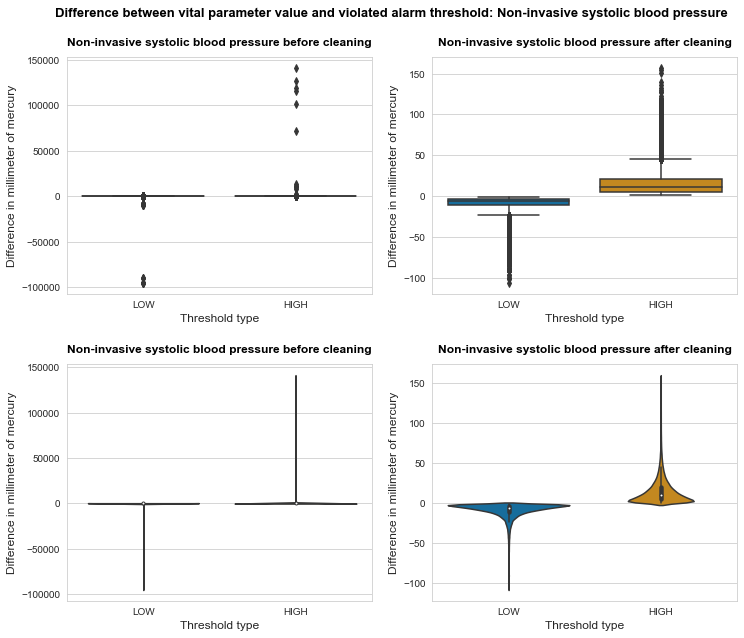

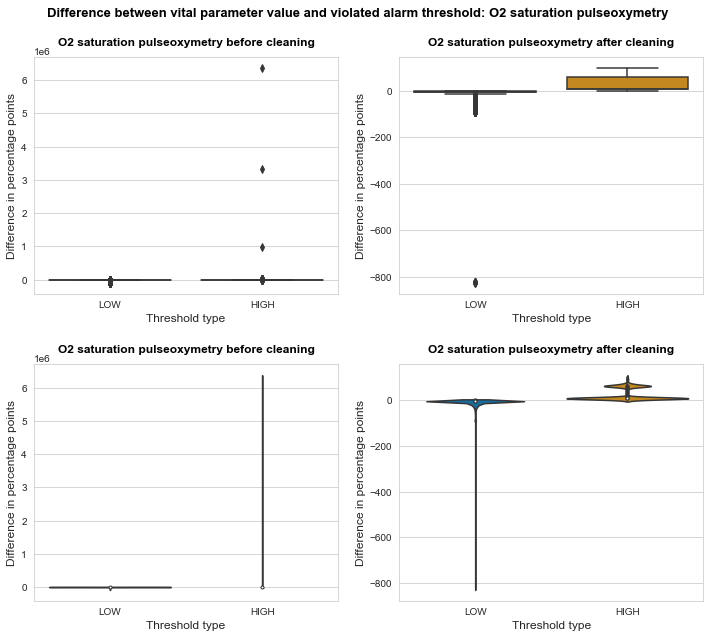

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Path to folder where the figures will be saved as PNGs
path = '../../plots/'

# Set shared variables
sns.set_style("whitegrid")

my_figsize = (12, 10)
my_dpi = 72 # used for display only, DPIs for saved PNGs are set separately

fig_title = "Difference between vital parameter value and violated alarm threshold: "
my_suptitle_fontweight = 'bold'
my_suptitle_color = 'black'
my_suptitle_fontsize = 13
my_suptitle_y = 0.95
my_subplots_adjust_hspace = 0.3

my_x = 'THRESHOLD_TYPE'
my_y = 'DIF_PARAMETER_THRESHOLD'
my_palette = [sns.color_palette("colorblind")[0],sns.color_palette("colorblind")[1],sns.color_palette("colorblind")[2]]

xlabel = "Threshold type"
my_xlabel_fontsize = 12
my_ylabel_fontsize = 12

my_title_fontweight = 'bold'
my_title_color = 'black'
my_title_fontsize = 12
my_title_y = 1.025
my_title_suffix_before = " before cleaning"
my_title_suffix_after = " after cleaning"
my_title_prefix_boxplot = "Boxplot: "
my_title_prefix_violinplot = "Violinplot: "

vital_parameters = pd.DataFrame({
    'LABEL':        ['Heart rate', 'Non-invasive systolic blood pressure', 'O2 saturation pulseoxymetry'],
    'ABBREVIATION': ['HR', 'BP', 'O2'],
    'UNIT':         ['beats per minute', 'millimeter of mercury', 'percentage points'], # 'percentage points' instead of 'percent' because we compute the difference
    'VALUE_ITEMID': [220045, 220179, 220277]})

for i, vital_parameter in vital_parameters.iterrows():

    uncleaned_plotdata = uncleaned_alarms[(uncleaned_alarms['ITEMID'] == vital_parameter.VALUE_ITEMID)]
    cleaned_plotdata = cleaned_alarms[(cleaned_alarms['ITEMID'] == vital_parameter.VALUE_ITEMID)]

    fig, axs = plt.subplots(2, 2, figsize = my_figsize, dpi = my_dpi)
    fig.suptitle(str(fig_title+vital_parameter.LABEL), fontweight = my_suptitle_fontweight, color = my_suptitle_color, fontsize = my_suptitle_fontsize, y = my_suptitle_y)
    fig.subplots_adjust(hspace = my_subplots_adjust_hspace)

    sns.boxplot(
        ax = axs[0,0],
        data = uncleaned_plotdata,
        x = my_x,
        y = my_y,
        palette = my_palette
        )
    axs[0,0].set_title(
        str(vital_parameter.LABEL+my_title_suffix_before), 
        fontweight = my_title_fontweight, color = my_title_color, fontsize = my_title_fontsize, y = my_title_y)
    
    sns.boxplot(
        ax = axs[0,1],
        data = cleaned_plotdata,
        x = my_x,
        y = my_y,
        palette = my_palette
        )
    axs[0,1].set_title(
        str(vital_parameter.LABEL+my_title_suffix_after), 
        fontweight = my_title_fontweight, color = my_title_color, fontsize = my_title_fontsize, y = my_title_y)

    sns.violinplot(
        ax = axs[1,0],
        data = uncleaned_plotdata,
        x = my_x,
        y = my_y,
        palette = my_palette
        )
    axs[1,0].set_title(
        str(vital_parameter.LABEL+my_title_suffix_before), 
        fontweight = my_title_fontweight, color = my_title_color, fontsize = my_title_fontsize, y = my_title_y)
    
    sns.violinplot(
        ax = axs[1,1],
        data = cleaned_plotdata,
        x = my_x,
        y = my_y,
        palette = my_palette
        )
    axs[1,1].set_title(
        str(vital_parameter.LABEL+my_title_suffix_after), 
        fontweight = my_title_fontweight, color = my_title_color, fontsize = my_title_fontsize, y = my_title_y)
    
    for i in [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]:
        i.set_xlabel(xlabel, fontsize = my_xlabel_fontsize)
        i.set_ylabel(str("Difference in "+vital_parameter.UNIT), fontsize = my_ylabel_fontsize)
    
    # Save figure as PNG file
    timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
    # plt.savefig(str(path + 'difference-to-threshold_' + str(vital_parameter.ABBREVIATION) +'_72-DPI_' + timestamp + '.png'), dpi=72, bbox_inches='tight')
    # plt.savefig(str(path + 'difference-to-threshold_' + str(vital_parameter.ABBREVIATION) +'_300-DPI_' + timestamp + '.png'), dpi=300, bbox_inches='tight')

    plt.show(fig)
